# Overweight prevalence among children under 5 years of age (% weight-for-height >+2 SD)
## Group Members
* NEO ZHENG WENG A22EC0093
* WONG KHAI SHIAN NICHOLAS A22EC0292
* LOO JIA CHANG A22EC0074
* JOSEPH LAU YEO KAI A22EC0055
* GOH JING YANG A22EC0052

# Video Presentation
* [Video link](https://drive.google.com/file/d/1LFx3_2Mlns0iWtw72GOlpg9E370yKMso/view?usp=sharing)

# Project Setup
Run the code below to install the libraries.

```
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn tensorflow

```



In [ ]:
# pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn tensorflow

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

# Dataset
* Dataset from World Health Statistics (given by project instruction)
* Data source:
[Overweight prevalence among children under 5 years of age (% weight-for-height >+2 SD)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/gho-jme-country-children-aged-5-years-overweight-(-weight-for-height-2-sd))

In [ ]:
file_path = '/content/Overweight_prevalence_among_children_under_5_years.csv'

# Load the CSV, treating only true missing values (empty cells) as NaN, preserving 'None' as a string
df = pd.read_csv(file_path, keep_default_na=False, na_values=[""])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72195 entries, 0 to 72194
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               72195 non-null  object 
 1   Indicator                   72195 non-null  object 
 2   ValueType                   72195 non-null  object 
 3   ParentLocationCode          72195 non-null  object 
 4   ParentLocation              72195 non-null  object 
 5   Location type               72195 non-null  object 
 6   SpatialDimValueCode         72195 non-null  object 
 7   Location                    72195 non-null  object 
 8   Period type                 72195 non-null  object 
 9   Period                      72195 non-null  int64  
 10  IsLatestYear                72195 non-null  bool   
 11  Dim1 type                   67525 non-null  object 
 12  Dim1                        67525 non-null  object 
 13  Dim1ValueCode               675

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NUTRITION_ANT_WHZ_NE2,Overweight prevalence among children under 5 y...,numeric,AFR,Africa,Country,SEN,Senegal,Year,2023,...,NaN,NaN,NaN,NaN,NaN,0.2,NaN,Enquête Démographique et de Santé du Sénégal 2...,EN,2024-08-13T16:00:00.000Z
1,NUTRITION_ANT_WHZ_NE2,Overweight prevalence among children under 5 y...,numeric,AFR,Africa,Country,SEN,Senegal,Year,2023,...,NaN,NaN,NaN,NaN,NaN,0.2,NaN,Enquête Démographique et de Santé du Sénégal 2...,EN,2024-08-13T16:00:00.000Z
2,NUTRITION_ANT_WHZ_NE2,Overweight prevalence among children under 5 y...,numeric,AFR,Africa,Country,SEN,Senegal,Year,2023,...,NaN,NaN,NaN,NaN,NaN,0.4,NaN,Enquête Démographique et de Santé du Sénégal 2...,EN,2024-08-13T16:00:00.000Z
3,NUTRITION_ANT_WHZ_NE2,Overweight prevalence among children under 5 y...,numeric,AFR,Africa,Country,SEN,Senegal,Year,2023,...,NaN,NaN,NaN,NaN,NaN,0.6,NaN,Enquête Démographique et de Santé du Sénégal 2...,EN,2024-08-13T16:00:00.000Z
4,NUTRITION_ANT_WHZ_NE2,Overweight prevalence among children under 5 y...,numeric,AFR,Africa,Country,SEN,Senegal,Year,2023,...,NaN,NaN,NaN,NaN,NaN,0.6,NaN,Enquête Démographique et de Santé du Sénégal 2...,EN,2024-08-13T16:00:00.000Z


Before cleaning the data, view on the features/attributes on each dimension (Dim1 and Dim2)

In [ ]:
# View unique attributes in Dim1
unique_dim1_types = df['Dim1 type'].unique()
print("Unique attributes in Dim1:\n", unique_dim1_types)

# View unique values in Dim1
unique_dim1_values = df['Dim1'].unique()
print("\nUnique values in Dim1:\n", unique_dim1_values)

# View unique attributes in Dim2
unique_dim2_types = df['Dim2 type'].unique()
print("\nUnique attributes in Dim2:\n", unique_dim2_types)

# View unique values in Dim2
unique_dim2_values = df['Dim2'].unique()
print("\nUnique values in Dim2:\n", unique_dim2_values)

Unique attributes in Dim1:
 ['Age Group' 'Education Level' 'Residence Area Type' 'Sex' nan
 'Household wealth' 'Wealth decile' 'Wealth Quintile' 'Wealth tercile']

Unique values in Dim1:
 ['24 to 35 months' '48 to 59 months' '24 to 59 months' 'None' 'Rural'
 '36 to 47 months' 'Male' 'Primary' nan '12 to 23 months' '6 to 11 months'
 'All age groups (total)' 'Total' 'Both sexes' 'Female' '0 to 5 months'
 '54 to 59 months' 'Q4' '0 to 23 months' 'Q5 (Richest)' 'Urban'
 '42 to 47 months' '36 to 59 months' '48 to 53 months' '36 to 41 months'
 'Secondary or higher' '18 to 23 months' '24 to 29 months'
 '30 to 35 months' 'None and primary education' '12 to 59 months'
 '6 to 59 months' '12 to 17 months' '6 to 23 months' '0 to 11 months'
 'Secondary education' 'Higher education' 'Q1 (Poorest)' 'Q2' 'Q3'
 'Wealth - Bottom 40%' 'Wealth - Middle 60%' 'Wealth - Bottom 80%'
 'Decile 9' 'Decile 1 (poorest)' 'Wealth - Bottom 60%' 'Decile 2'
 'Wealth - Top 80%' 'Decile 6' 'Decile 8' 'Decile 4' 'Decile 5'

# Research Questions
* Trend Analysis: How has the overweight prevalence among children under 5 years changed globally over the past decades?

* Regional Disparities: Are there significant regional disparities in overweight prevalence among children under 5 years, and which regions are most/least affected?

* Urban vs. Rural: How does overweight prevalence differ between urban and rural areas?

* Impact of Education: Does the level of education of parents influence the  overweight prevalence of the children under 5 years of age?

* How wealth affect significantly on the overweight prevalence?

* How have regional trends in the prevalence of overweight children under 5 years of age changed across decades, and what factors contribute to these variations?

* Can we accurately classify overweight prevalence categories (Low, Medium, High) for children under 5 years, based on regional, temporal, and demographic factors?

* What is the predicted trend of overweight prevalence among children under 5 years in Germany over the next 5 years (2024–2028)

# Data Cleaning, Preparation and Wrangling
The data was cleaned by dropping irrelevant columns, duplicate rows, and handling missing values by removing rows with critical missing data (`FactValueNumeric`, `Dim1`) and filling others with `'Unknown'`. Additionally, column names were standardized, numerical columns were typecast, a `Decade` column was created for time-based grouping, prevalence values were categorized into `Low`, `Medium`, and `High` levels for better analysis, and age group were combined into a new column.

In [ ]:
# Data cleaning, preparation and wrangling

# Drop irrelevant columns
columns_to_drop = [
    'Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode',
    'FactValueUoM', 'FactValueNumericPrefix', 'FactValueTranslationID',
    'FactComments', 'Language', 'DateModified', 'DataSource',
    'FactValueNumericLowPrefix', 'FactValueNumericHighPrefix', 'Dim2ValueCode',
    'FactValueNumericLow', 'FactValueNumericHigh', 'Dim1ValueCode'
]

df_cleaned = df.drop(columns=columns_to_drop).copy()

# Drop duplicates rows
df_cleaned = df_cleaned.drop_duplicates()

# Handling missing values
# Drop rows where 'FactValueNumeric' is missing as it contains critical prevalence values needed for analysis.
df_cleaned = df_cleaned.dropna(subset=['FactValueNumeric'])

# Drop rows where 'Dim1' is missing because 'Dim1' represents essential demographic or categorical data.
df_cleaned = df_cleaned.dropna(subset=['Dim1'])

# Replace missing values in 'Dim2' with 'Unknown' as it is supplementary and not always critical; ensures consistency.
df_cleaned['Dim2'] = df_cleaned['Dim2'].fillna('Unknown')

# Replace missing values in 'Dim2 type' with 'Unknown' to maintain data integrity and avoid null values during analysis.
df_cleaned['Dim2 type'] = df_cleaned['Dim2 type'].fillna('Unknown')

# Standardize column names
df_cleaned.rename(columns={
    'FactValueNumeric': 'Prevalence',
    'ParentLocation': 'Region',
    'ParentLocationCode': 'RegionCode',
    'SpatialDimValueCode': 'CountryCode',
    'Location': 'Country',
    'Period': 'Year',
}, inplace=True)

# Filter rows with numeric df
df_cleaned = df_cleaned[df_cleaned['ValueType'] == 'numeric']

# Verify and update df types
df_cleaned.loc[:, 'Prevalence'] = df_cleaned['Prevalence'].astype(float)
df_cleaned.loc[:, 'Year'] = df_cleaned['Year'].astype(int)

# Create a new column for Decade
df_cleaned.loc[:, 'Decade'] = (df_cleaned['Year'] // 10) * 10

# Categorize prevalence levels: Low (<5), Medium (5-10), High (>10)
def categorize_prevalence(value):
    if value < 5:
        return 'Low'
    elif 5 <= value < 10:
        return 'Medium'
    else:
        return 'High'

df_cleaned.loc[:, 'PrevalenceCategory'] = df_cleaned['Prevalence'].apply(categorize_prevalence)

# Verify and update df types
df_cleaned.loc[:, 'PrevalenceCategory'] = df_cleaned['PrevalenceCategory'].astype('category')
df_cleaned.loc[:, 'Decade'] = df_cleaned['Decade'].astype(int)

df_cleaned.shape

<ipython-input-4-766951d5e07d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Dim2'] = df_cleaned['Dim2'].fillna('Unknown')
<ipython-input-4-766951d5e07d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Dim2 type'] = df_cleaned['Dim2 type'].fillna('Unknown')
<ipython-input-4-766951d5e07d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

(67525, 19)

In [ ]:
# Combine both Dim1 and Dim2 age group

def combine_age_groups(row):
    # Case 1: Dim1 contains age group
    if pd.notna(row['Dim1']) and ('months' in str(row['Dim1']).lower() or 'years' in str(row['Dim1']).lower()):
        return row['Dim1']
    # Case 2: Dim2 contains age group
    if pd.notna(row['Dim2']) and ('months' in str(row['Dim2']).lower() or 'years' in str(row['Dim2']).lower()):
        return row['Dim2']
    # Case 3: Both are missing or no valid age group in either column
    return 'Unknown'

df_cleaned['CombinedAgeGroup'] = df_cleaned.apply(combine_age_groups, axis=1)

# Verify unique combined age groups
print("Unique Combined Age Groups:\n", df_cleaned['CombinedAgeGroup'].unique())

Unique Combined Age Groups:
 ['24 to 35 months' '48 to 59 months' '24 to 59 months' 'Unknown'
 '36 to 47 months' '54 to 59 months' '12 to 23 months' '6 to 11 months'
 '48 to 53 months' '0 to 5 months' '42 to 47 months' '0 to 23 months'
 '36 to 59 months' '18 to 23 months' '36 to 41 months' '24 to 29 months'
 '30 to 35 months' '12 to 59 months' '6 to 59 months' '12 to 17 months'
 '0 to 11 months' '6 to 23 months' '6 to 8 months' '9 to 11 months']


In [ ]:
# Overview on cleaned dataset
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 67525 entries, 0 to 72194
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IndicatorCode       67525 non-null  object 
 1   Indicator           67525 non-null  object 
 2   ValueType           67525 non-null  object 
 3   RegionCode          67525 non-null  object 
 4   Region              67525 non-null  object 
 5   Location type       67525 non-null  object 
 6   CountryCode         67525 non-null  object 
 7   Country             67525 non-null  object 
 8   Period type         67525 non-null  object 
 9   Year                67525 non-null  int64  
 10  IsLatestYear        67525 non-null  bool   
 11  Dim1 type           67525 non-null  object 
 12  Dim1                67525 non-null  object 
 13  Dim2 type           67525 non-null  object 
 14  Dim2                67525 non-null  object 
 15  Prevalence          67525 non-null  float64
 16  Value    

,IndicatorCode,Indicator,ValueType,RegionCode,Region,Location type,CountryCode,Country,Period type,Year,IsLatestYear,Dim1 type,Dim1,Dim2 type,Dim2,Prevalence,Value,Decade,PrevalenceCategory,CombinedAgeGroup
0,NUTRITION_ANT_WHZ_NE2,Overweight prevalence among children under 5 y...,numeric,AFR,Africa,Country,SEN,Senegal,Year,2023,True,Age Group,24 to 35 months,Unknown,Unknown,0.2,0.2,2020,Low,24 to 35 months
1,NUTRITION_ANT_WHZ_NE2,Overweight prevalence among children under 5 y...,numeric,AFR,Africa,Country,SEN,Senegal,Year,2023,True,Age Group,48 to 59 months,Unknown,Unknown,0.2,0.2,2020,Low,48 to 59 months
2,NUTRITION_ANT_WHZ_NE2,Overweight prevalence among children under 5 y...,numeric,AFR,Africa,Country,SEN,Senegal,Year,2023,True,Age Group,24 to 59 months,Unknown,Unknown,0.4,0.4,2020,Low,24 to 59 months
3,NUTRITION_ANT_WHZ_NE2,Overweight prevalence among children under 5 y...,numeric,AFR,Africa,Country,SEN,Senegal,Year,2023,True,Education Level,None,Unknown,Unknown,0.6,0.6,2020,Low,Unknown
4,NUTRITION_ANT_WHZ_NE2,Overweight prevalence among children under 5 y...,numeric,AFR,Africa,Country,SEN,Senegal,Year,2023,True,Residence Area Type,Rural,Unknown,Unknown,0.6,0.6,2020,Low,Unknown


In [ ]:
# Export the cleaned dataset
df_cleaned.to_csv('df_cleaned.csv', index=False)

# Data Aggregation and Group Operations
Data aggregation and grouping operations were performed to calculate average prevalence rates across various dimensions such as year, decade, region, urban/rural areas, education levels, and wealth categories. This included creating summaries, pivot tables, and analyzing differences by sex, age groups, and regional disparities to gain insights into trends and patterns in the data.


In [ ]:
# 1. Trend Analysis: Global and Decadal Trends
# Group by 'Year' to calculate the average prevalence for each year
global_yearly_trend = df_cleaned.groupby('Year')['Prevalence'].mean().reset_index()
print("\nGlobal Yearly Trend:\n", global_yearly_trend.head())

# Group by 'Decade' to calculate the average prevalence for each decade
global_decade_trend = df_cleaned.groupby('Decade')['Prevalence'].mean().reset_index()
print("\nGlobal Decadal Trend:\n", global_decade_trend.head())

# 2. Regional Disparities
# Group by 'Region' and 'Year' to calculate the average prevalence for each region per year
region_year_summary = df_cleaned.groupby(['Region', 'Year'])['Prevalence'].mean().reset_index()
print("\nAverage prevalence by Region and Year:\n", region_year_summary.head())

# Group by 'Region' and 'Decade' to calculate the average prevalence for each region per decade
region_decade_summary = df_cleaned.groupby(['Region', 'Decade'])['Prevalence'].mean().reset_index()
print("\nAverage prevalence by Region and Decade:\n", region_decade_summary.head())

# 3. Urban vs. Rural Differences
# Filter data for 'Urban' and 'Rural' categories in 'Dim1' and calculate the average prevalence
urban_rural_data = df_cleaned[df_cleaned['Dim1'].isin(['Urban', 'Rural'])]
urban_rural_summary = urban_rural_data.groupby('Dim1')['Prevalence'].mean().reset_index()
print("\nUrban vs. Rural Prevalence:\n", urban_rural_summary)

# 4. Impact of Education
# Filter data for education levels mentioned in 'Dim1' and calculate the average prevalence
education_data = df_cleaned[df_cleaned['Dim1'].str.contains("None|Primary|Secondary|Higher|Education", na=False)]
education_summary = education_data.groupby('Dim1')['Prevalence'].mean().reset_index()
print("\nPrevalence by Education Level:\n", education_summary)

# 5. Impact of Household Wealth
# Filter data for wealth categories mentioned in 'Dim1' and calculate the average prevalence
wealth_data = df_cleaned[df_cleaned['Dim1'].str.contains('Wealth - ', na=False)]
wealth_summary = wealth_data.groupby('Dim1')['Prevalence'].mean().reset_index()
print("\nPrevalence by Wealth Categories:\n", wealth_summary)

# 6. Impact of Wealth Decile
# Filter data for wealth decile categories in 'Dim1' and calculate the average prevalence
wealth_decile_data = df_cleaned[df_cleaned['Dim1'].str.contains('Decile', na=False)]
wealth_decile_summary = wealth_decile_data.groupby('Dim1')['Prevalence'].mean().reset_index()
print("\nPrevalence by Wealth Decile:\n", wealth_decile_summary)

# 7. Impact of Wealth Quintile
# Filter data for wealth quintile categories in 'Dim1' and calculate the average prevalence
wealth_quintile_data = df_cleaned[df_cleaned['Dim1'].str.contains('Q', na=False)]
wealth_quintile_summary = wealth_quintile_data.groupby('Dim1')['Prevalence'].mean().reset_index()
print("\nPrevalence by Wealth Quintile:\n", wealth_quintile_summary)

# 8. Impact of Wealth Tercile
# Filter data for wealth tercile categories in 'Dim1' and calculate the average prevalence
wealth_tercile_data = df_cleaned[df_cleaned['Dim1'].str.contains('Tercile', na=False)]
wealth_tercile_summary = wealth_tercile_data.groupby('Dim1')['Prevalence'].mean().reset_index()
print("\nPrevalence by Wealth Tercile:\n", wealth_tercile_summary)

# 9. Sex Differences
# Filter data for 'Male', 'Female', and 'Both sexes' in 'Dim1' and calculate the average prevalence
sex_data = df_cleaned[df_cleaned['Dim1'].isin(['Male', 'Female', 'Both sexes'])]
sex_summary = sex_data.groupby('Dim1')['Prevalence'].mean().reset_index()
print("\nPrevalence by Sex:\n", sex_summary)

# 10. Combined Age Group
# Remove rows with 'Unknown' in 'CombinedAgeGroup' and calculate average prevalence and count for each age group
age_group_filtered = df_cleaned[df_cleaned['CombinedAgeGroup'] != 'Unknown']
age_group_summary = age_group_filtered.groupby('CombinedAgeGroup')['Prevalence'].agg(['mean', 'count']).reset_index()
age_group_summary.rename(columns={'mean': 'Prevalence', 'count': 'Count'}, inplace=True)
age_group_summary = age_group_summary.sort_values('Prevalence', ascending=False)
print("\nAverage prevalence by Combined Age Group (excluding 'Unknown'):\n", age_group_summary)

# 11. Pivot Table: Average prevalence by Decade and Region
# Create a pivot table to calculate the average prevalence for each region across decades
pivot_table = df_cleaned.pivot_table(
    index='Decade',
    columns='Region',
    values='Prevalence',
    aggfunc='mean'
).reset_index()
print("\nPivot table of average prevalence by Decade and Region:\n", pivot_table.head())


Global Yearly Trend:
    Year  Prevalence
0  1983    3.100000
1  1985   12.350000
2  1986    4.587018
3  1987    2.623156
4  1988    4.302551

Global Decadal Trend:
    Decade  Prevalence
0    1980    4.155366
1    1990    5.878636
2    2000    7.302782
3    2010    5.567073
4    2020    4.678634

Average prevalence by Region and Year:
    Region  Year  Prevalence
0  Africa  1985    8.800000
1  Africa  1986    3.880451
2  Africa  1987    1.014615
3  Africa  1988    3.478667
4  Africa  1990    2.887805

Average prevalence by Region and Decade:
    Region  Decade  Prevalence
0  Africa    1980    3.095804
1  Africa    1990    4.940092
2  Africa    2000    6.254120
3  Africa    2010    3.547095
4  Africa    2020    2.772654

Urban vs. Rural Prevalence:
     Dim1  Prevalence
0  Rural    6.080360
1  Urban    6.927545

Prevalence by Education Level:
                          Dim1  Prevalence
0            Higher education    8.664012
1                        None    4.716049
2  None and prima

# Analysis and Visualization

### Research Question 1:
How has the overweight prevalence among children under 5 years changed globally over the past decades?

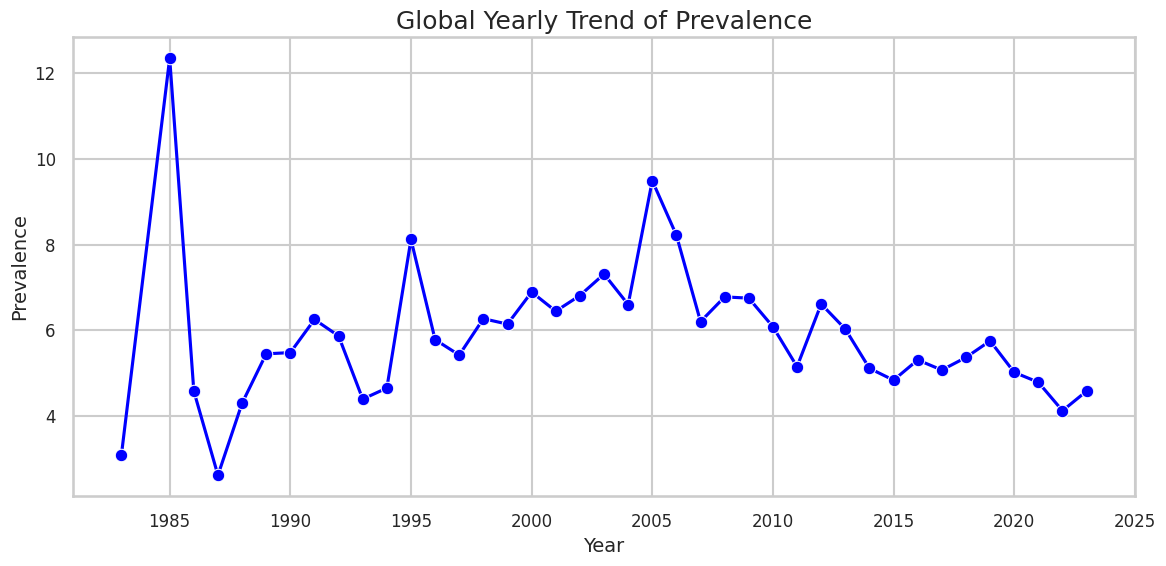

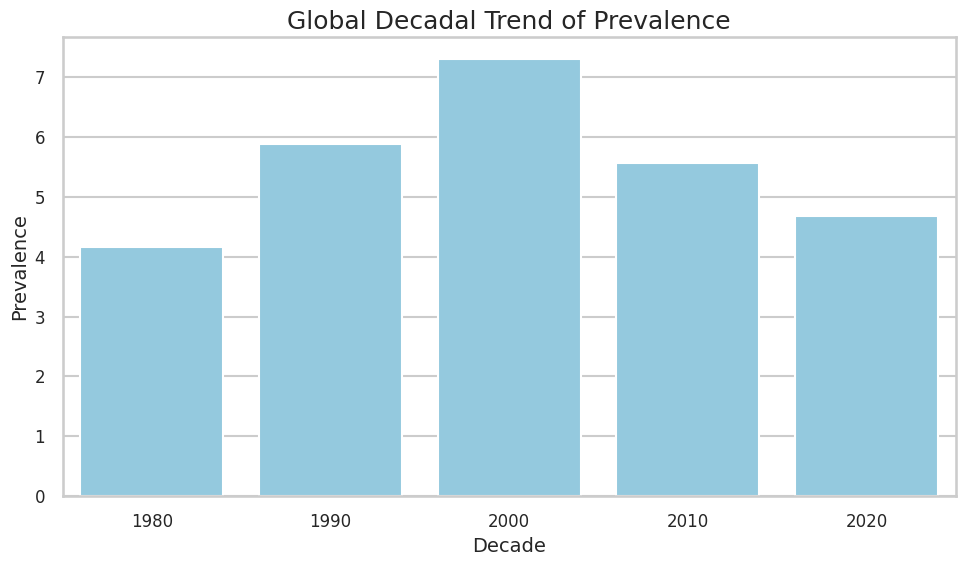

In [ ]:
# Set the default theme for all plots
sns.set_theme(style="whitegrid", context="talk")

# 1. Global Yearly and Decadal Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_yearly_trend, x='Year', y='Prevalence', marker='o', color='blue')
plt.title('Global Yearly Trend of Prevalence', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Prevalence', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Decade', y='Prevalence', data=global_decade_trend, color='skyblue')
plt.title('Global Decadal Trend of Prevalence', fontsize=18)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Prevalence', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Answer to Question 1:

Based on the plotted graph, the yearly trend of prevalence among children under 5 years old is experiencing an initial low point before the mid 1980s. The it is showing a large spike and rapid decline in the mid 1980s. Which after the decline, it is gradually increasing. Then has been slowly decreasing from the early 2000s to the present day, although there are still small fluctuations.

### Research Question 2:
Regional Disparities: Are there significant regional disparities in overweight prevalence among children under 5 years, and which regions are most/least affected?

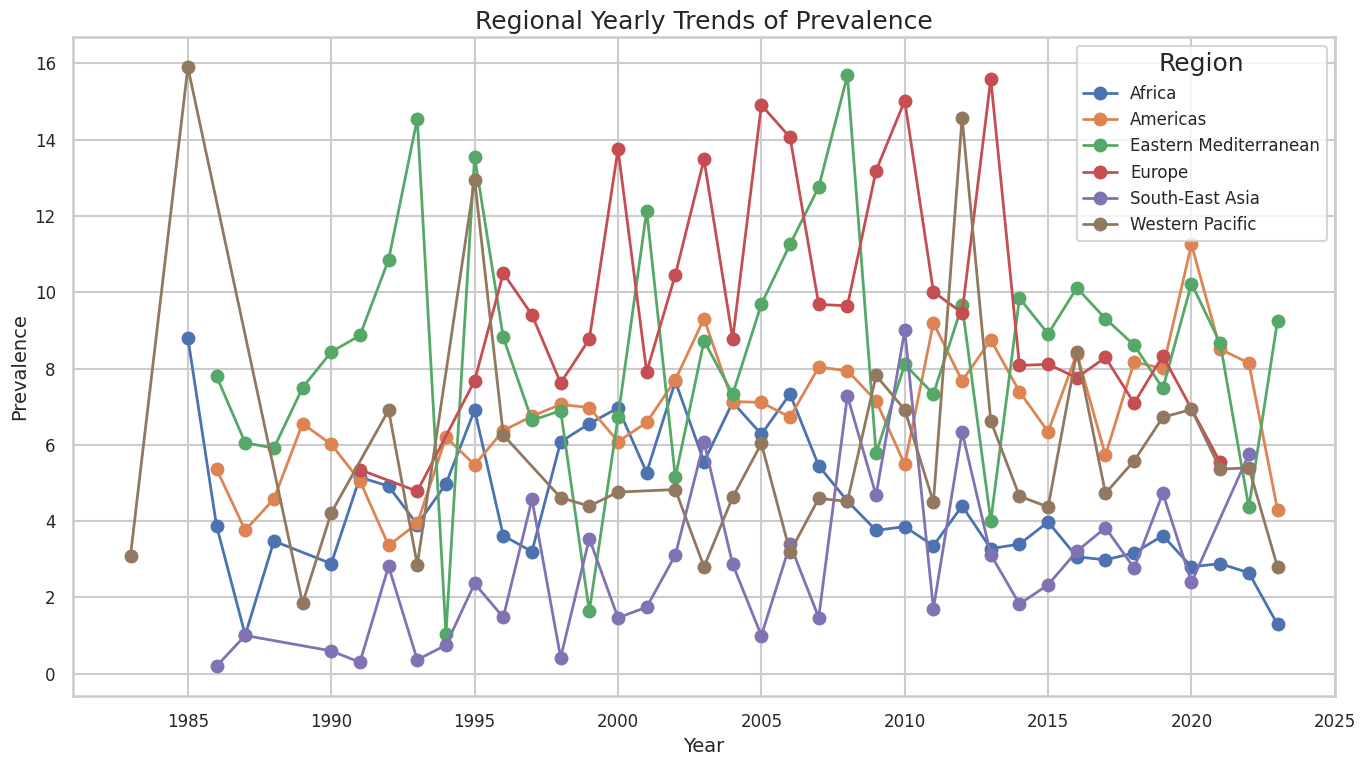

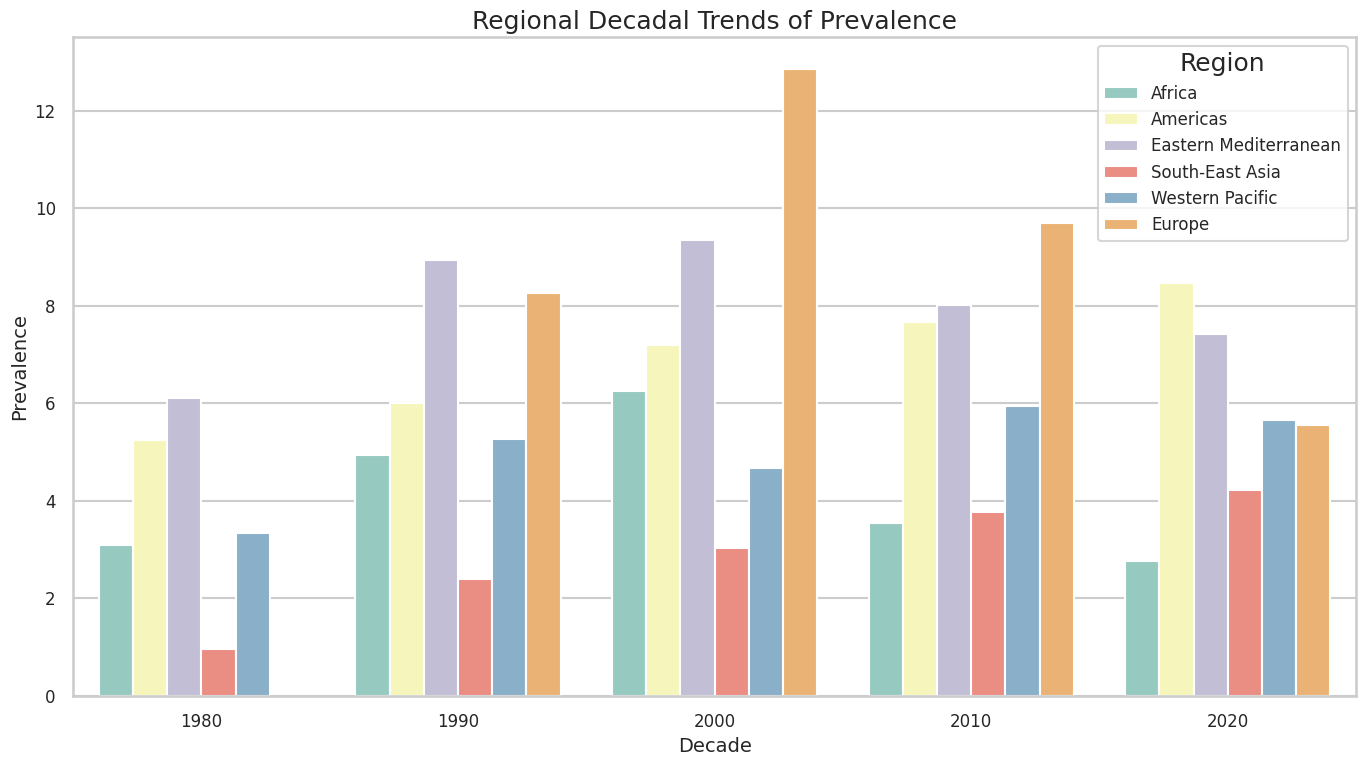

In [ ]:
sns.set_theme(style="whitegrid", context="talk")
# 2. Regional Disparities
plt.figure(figsize=(14, 8))
for region in region_year_summary['Region'].unique():
    region_data = region_year_summary[region_year_summary['Region'] == region]
    plt.plot(region_data['Year'], region_data['Prevalence'], label=region, marker='o', linewidth=2)
plt.title('Regional Yearly Trends of Prevalence', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Prevalence', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Region', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Decade', y='Prevalence', hue='Region', data=region_decade_summary, palette='Set3')
plt.title('Regional Decadal Trends of Prevalence', fontsize=18)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Prevalence', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Region', fontsize=12)
plt.tight_layout()
plt.show()

### Answer to Question 2:

Yes, there are significant regional disparities in overweight prevalence among children under 5 years old, both in yearly and decadal trends.
1. Regions Most Affected:

* Europe: The European region shows the highest levels of overweight prevalence in some periods (especially around the 2000s), but also a strong decline in later decades.

* Americas: The Americas region consistently shows high levels of overweight prevalence, and shows an increasing trend over the decades.

* Eastern Mediterranean: The Eastern Mediterranean shows a high prevalence around 1990s and 2000s.

2. Regions Least Affected:

* South-East Asia: The South-East Asia region consistently shows the lowest levels of overweight prevalence across all decades.

* Africa: The Africa region shows moderate levels, but has lower rates compared to Americas, Europe and Eastern

### Research Question 3:
Urban vs. Rural: How does overweight prevalence differ between urban and rural areas?



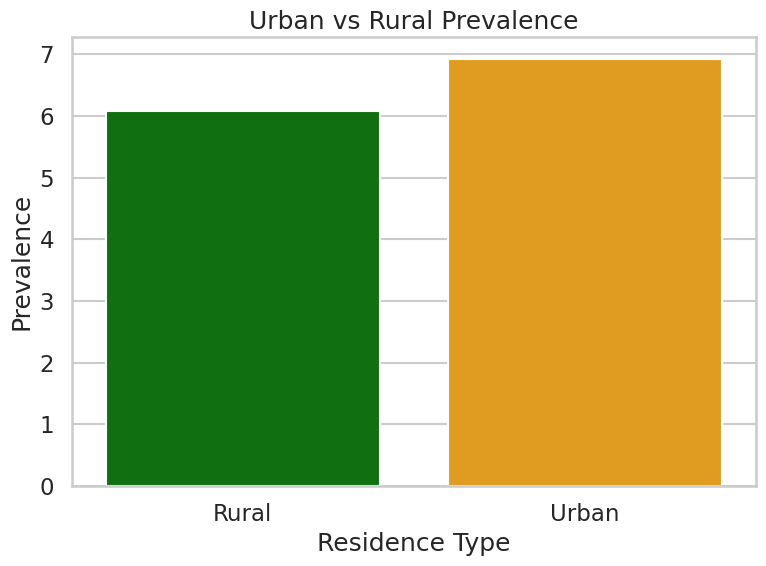

In [ ]:
# 3. Urban vs Rural Prevalence
plt.figure(figsize=(8, 6))
sns.barplot(x='Dim1', y='Prevalence', data=urban_rural_summary, hue='Dim1', palette={'Urban': 'orange', 'Rural': 'green'}, dodge=False)
plt.title('Urban vs Rural Prevalence')
plt.xlabel('Residence Type')
plt.ylabel('Prevalence')
plt.tight_layout()
plt.show()

### Answer to Question 3:

The plot shows that urban areas have a slightly higher overweight prevalence (approximately 7%) compared to rural areas (approximately 6%). This visual information clearly highlights a difference, though a small one.

The difference is about 1 percentage point, suggesting that there might be a mild tendency for urban areas to have higher overweight prevalence than rural areas, as of the most recent data available for this analysis. However, this difference might not be statistically significant.

###Research Question 4:
Impact of Education: Does the level of education of parents influence the  overweight prevalence of the children under 5 years of age?


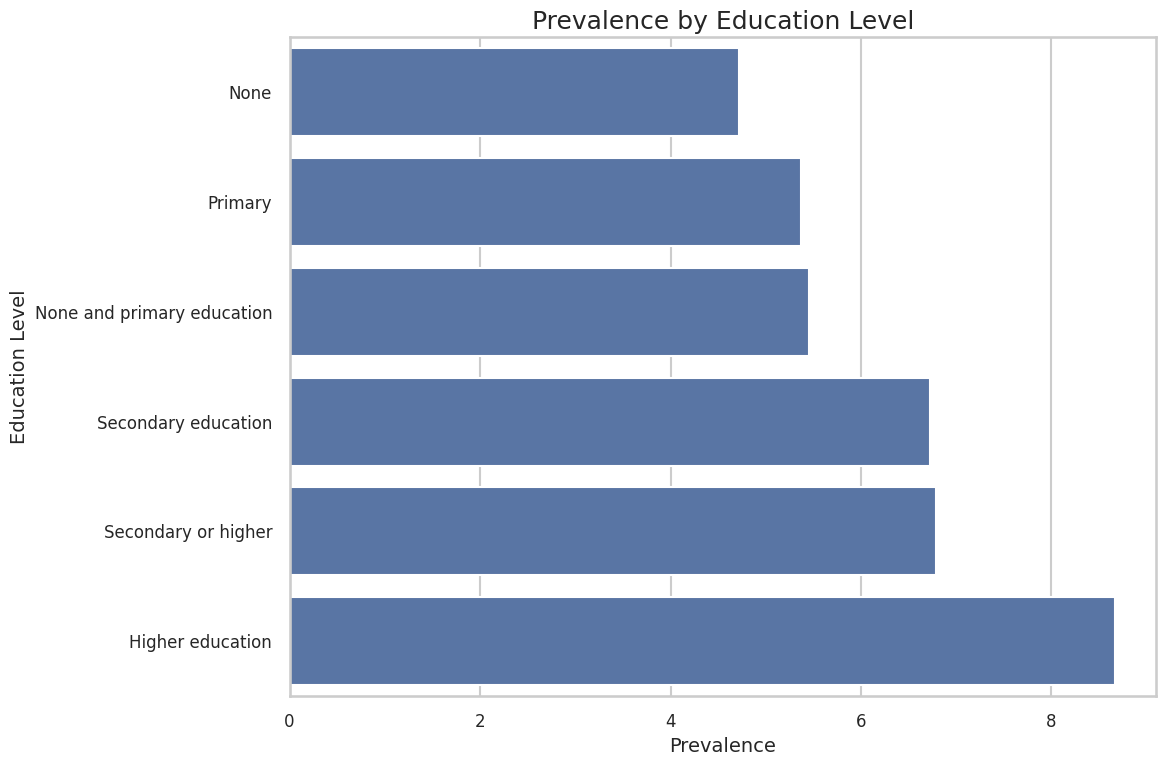

In [ ]:
# 4. Education Impact
plt.figure(figsize=(12, 8))
sns.barplot(x='Prevalence', y='Dim1', data=education_summary.sort_values('Prevalence'))
plt.title('Prevalence by Education Level', fontsize=18)
plt.xlabel('Prevalence', fontsize=14)
plt.ylabel('Education Level', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Answer to Question 4:


The bar chart, titled "Prevalence by Education Level," illustrates a clear correlation between parental education levels and the prevalence of overweight among children under 5 years old. The prevalence increases progressively with higher levels of education. Parents with no education or only primary education show the lowest prevalence rates, likely due to limited access to calorie-dense or processed foods and differing lifestyle practices. In contrast, parents with secondary or higher education demonstrate significantly higher prevalence rates, with the highest prevalence observed among those with higher education. This trend suggests that as education levels rise, families may experience improved socioeconomic status, leading to greater access to energy-dense foods and potentially more sedentary lifestyles. Despite higher education, there may be gaps in awareness regarding balanced nutrition and physical activity. Therefore, the chart underscores a positive correlation between parental education levels and childhood overweight prevalence, highlighting the need for targeted public health initiatives to promote healthy lifestyles among families with higher education levels.

### Research Question 5:
How wealth affect significantly on the overweight prevalence?

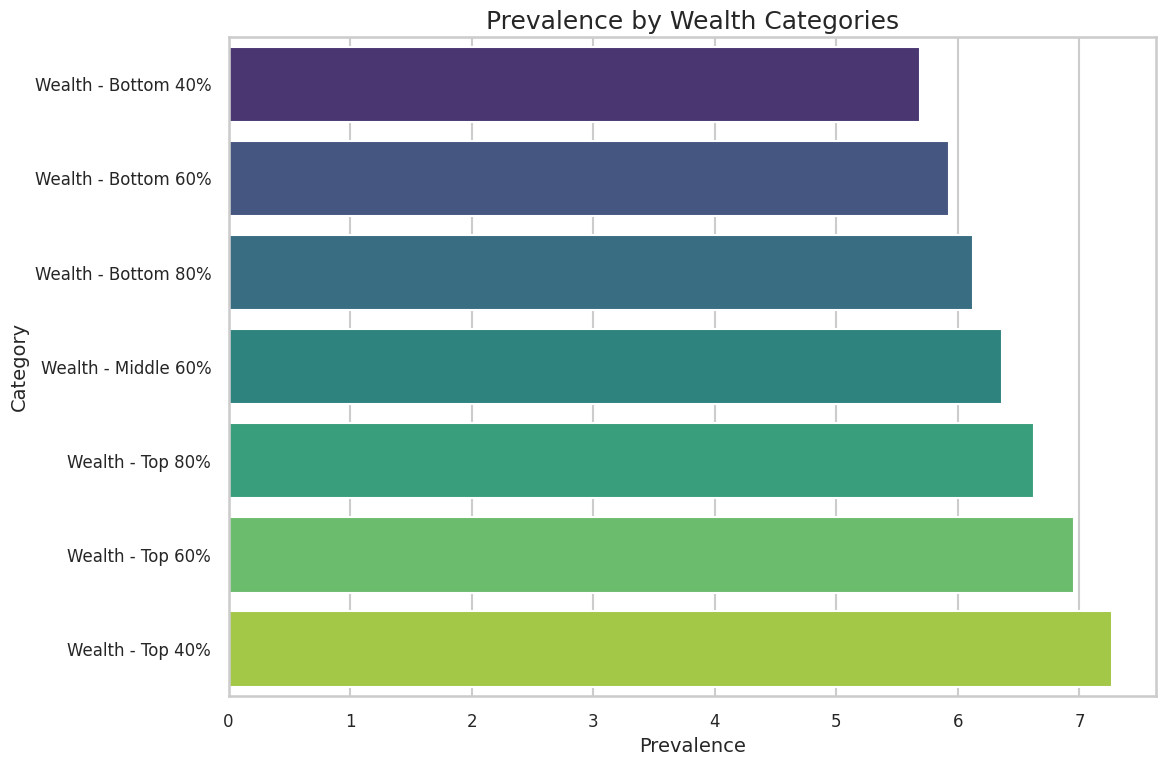

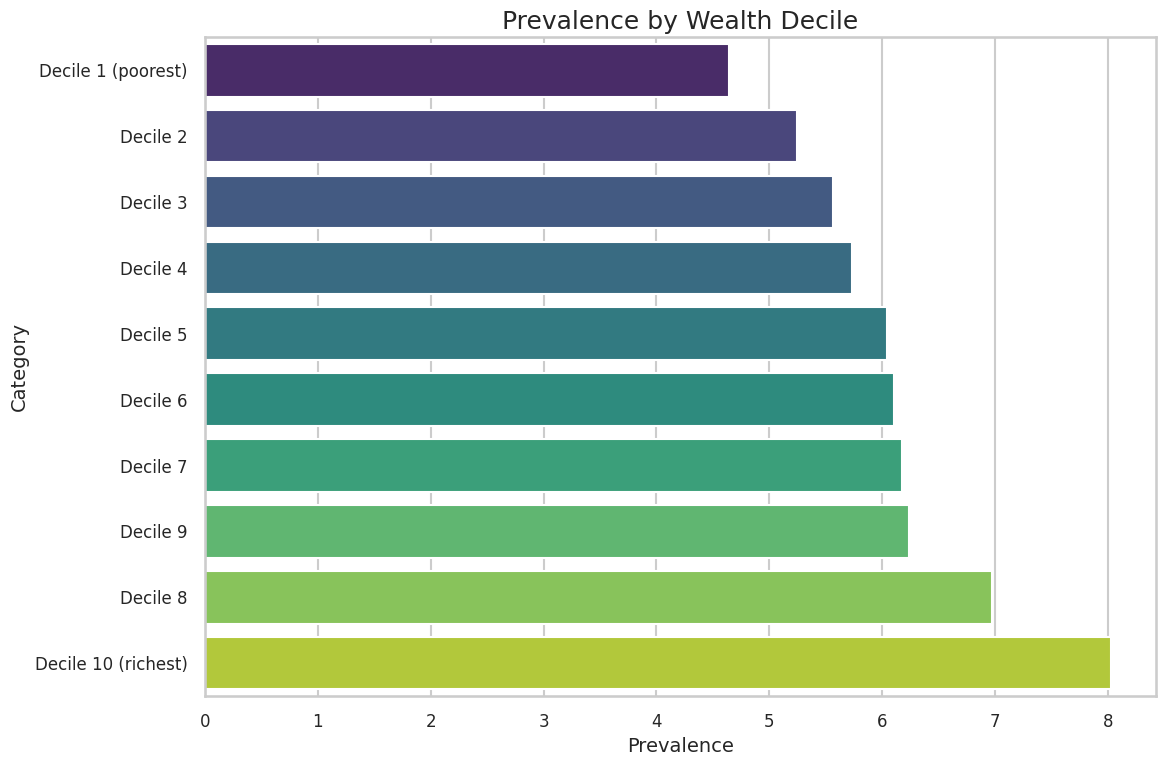

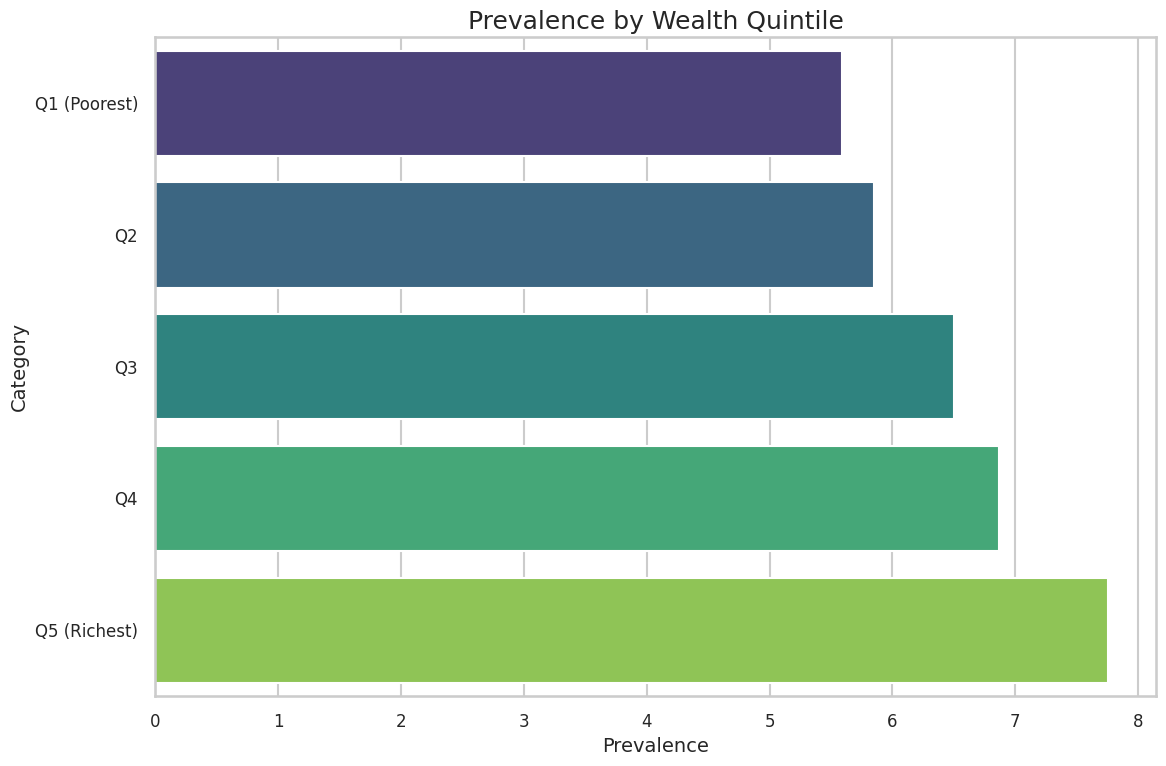

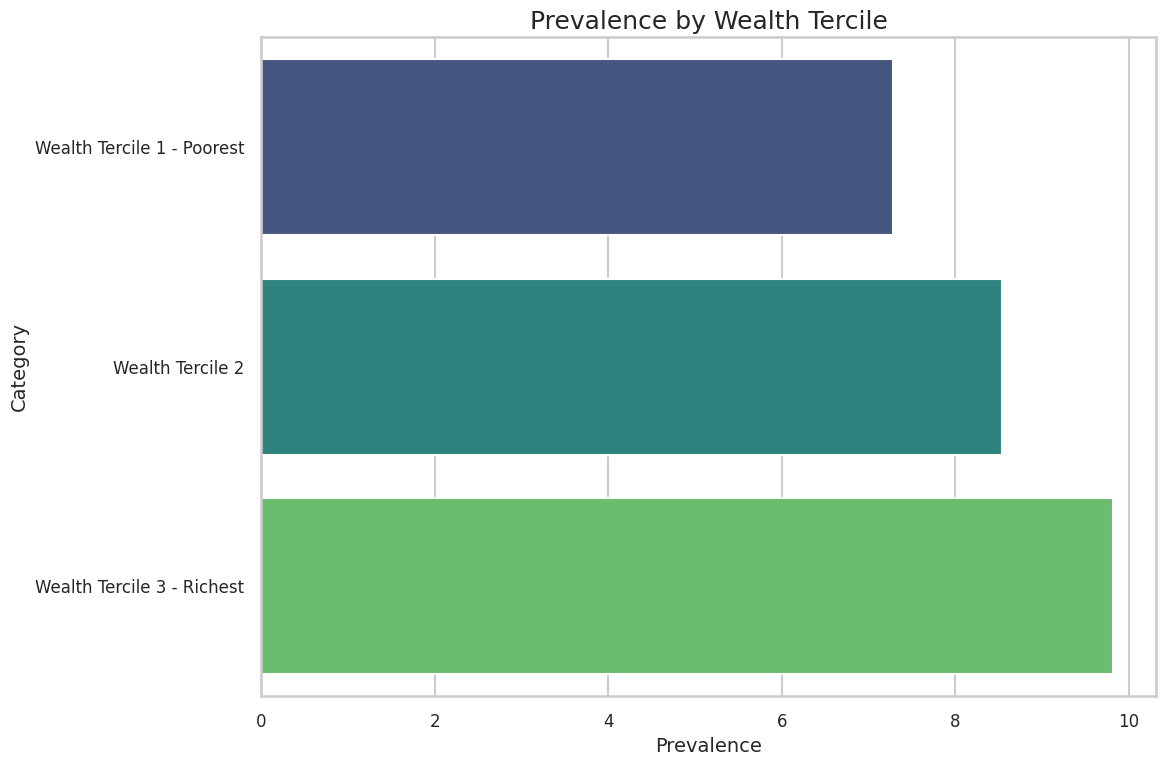

In [ ]:
# 5. Wealth Analysis
for wealth_summary_data, title in zip(
    [wealth_summary, wealth_decile_summary, wealth_quintile_summary, wealth_tercile_summary],
    ['Prevalence by Wealth Categories', 'Prevalence by Wealth Decile',
     'Prevalence by Wealth Quintile', 'Prevalence by Wealth Tercile']):
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x='Prevalence',
        y='Dim1',
        data=wealth_summary_data.sort_values('Prevalence'),
        hue='Dim1',  # Set the categorical variable as hue
        palette='viridis',
        dodge=False  # Ensures single bars, not grouped
    )
    plt.title(title, fontsize=18)
    plt.xlabel('Prevalence', fontsize=14)
    plt.ylabel('Category', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend([], [], frameon=False)  # Remove legend if not needed
    plt.tight_layout()
    plt.show()

### Answer to Question 5:
* General Trend: The plots show that the highest levels of overweight prevalence occur within the wealthiest groups for all the wealth data provided. It also shows that the poorest groups have lower rates of overweight.

* Wealth Categories: In the Prevalence by Wealth Categories plot, "Wealth - Top 40%", "Wealth - Top 60%", and "Wealth - Top 80%" show the highest overweight prevalence, and the "Wealth - Bottom 40%", "Wealth - Bottom 60%" and "Wealth - Bottom 80%" have lower prevalence.

* Wealth Decile: In the Prevalence by Wealth Decile plot, the highest prevalence occurs in "Decile 10 (richest)", at around 7.5%, and lowest in "Decile 1 (poorest)" at about 5%, with a decreasing trend as we go to less wealthy deciles.

* Wealth Quintile: In the Prevalence by Wealth Quintile plot, "Q5 (Richest)" shows the highest prevalence, at about 7.5%, while "Q1 (Poorest)" shows the lowest prevalence at around 5.5%.

* Wealth Tercile: In the Prevalence by Wealth Tercile plot, "Wealth Tercile 3 - Richest" shows a prevalence of around 8.5%, while "Wealth Tercile 1 - Poorest" shows the lowest level at about 6%.

The plots show that the most wealthy groups have the highest prevalence of overweight among children under 5, and the poorest groups have lower overweight prevalence rates, compared to the middle income categories. The factor causing this trend maybe due to the lifestyle chosen and the living cost in buying food.

### Research question 6:
How have regional trends in the prevalence of overweight children under 5 years of age changed across decades, and what factors contribute to these variations?

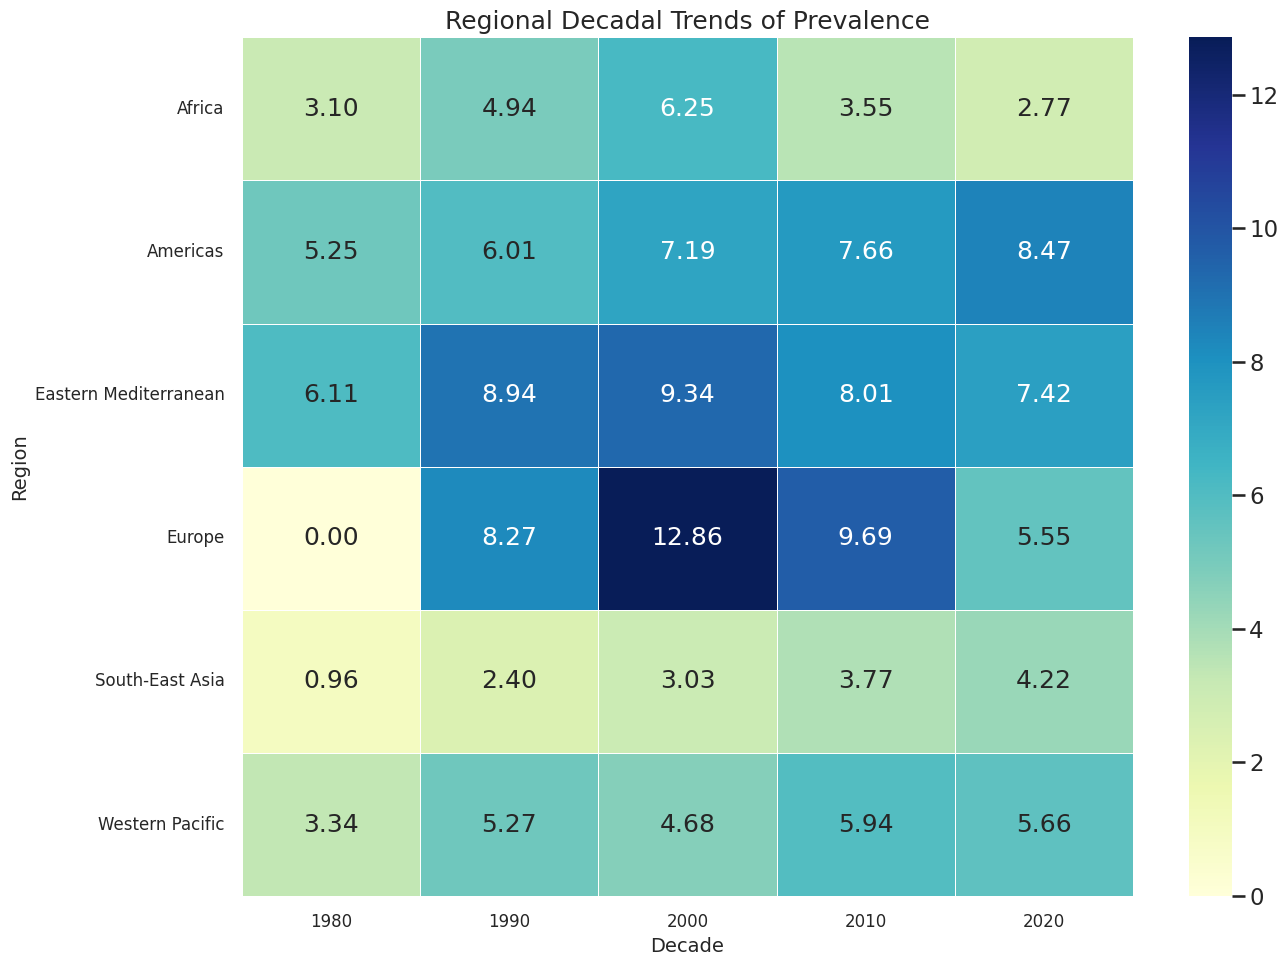

In [ ]:
sns.set_theme(style="whitegrid", context="talk")
# 6. Regional Decadal Trends (Heatmap)
pivot_table_filled = pivot_table.fillna(0)  # Replace NaN with 0 for heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table_filled.set_index('Decade').T, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Regional Decadal Trends of Prevalence', fontsize=18)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Answer to Question 6:

The graph illustrates the decadal trends in the prevalence of overweight children under 5 years of age across different regions. It highlights notable regional and temporal differences in these trends.

Europe and the Eastern Mediterranean consistently report higher prevalence rates compared to other regions. Europe peaked in the 1990s with a prevalence rate of 12.86, which then gradually declined over subsequent decades. Similarly, the Eastern Mediterranean demonstrated a high prevalence of 9.34 in the 1990s, followed by a decline in later decades. These regions may face unique contributing factors, such as rapid urbanization, dietary changes favoring processed foods, and sedentary lifestyles, which contribute to a higher prevalence of childhood overweight.

In contrast, regions like Africa and South-East Asia exhibit significantly lower prevalence rates throughout the observed period. Africa starts at 3.10 in the 1980s and declines to 2.77 by 2020, indicating a downward trend in overweight prevalence. South-East Asia, while initially low at 0.96 in the 1980s, shows a modest increase to 4.22 by 2020, suggesting gradual changes in lifestyle and nutrition. These differences might be attributed to varying socioeconomic conditions, cultural practices, and levels of access to processed foods in these regions.

Overall, the graph reveals how economic, cultural, and environmental factors influence the prevalence of overweight children in different parts of the world, emphasizing the need for region-specific strategies to combat childhood overweight and obesity

# Machine Learning

## Classification
* Model used: Neural Network Classification
### Research Question 7:
* Can we accurately classify overweight prevalence categories (Low, Medium, High) for children under 5 years, based on regional, temporal, and demographic factors?

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6676 - loss: 0.7312 - val_accuracy: 0.6170 - val_loss: 0.7464
Epoch 2/50
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7717 - loss: 0.5179 - val_accuracy: 0.7315 - val_loss: 0.6123
Epoch 3/50
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7930 - loss: 0.4744 - val_accuracy: 0.7172 - val_loss: 0.5945
Epoch 4/50
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8065 - loss: 0.4442 - val_accuracy: 0.7464 - val_loss: 0.5409
Epoch 5/50
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8142 - loss: 0.4201 - val_accuracy: 0.7614 - val_loss: 0.5164
Epoch 6/50
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8220 - loss: 0.4093 - val_accuracy: 0.7447 - val_loss: 0.5234
Epoch 7/50
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8274 - loss: 0.3946 - val_accuracy: 0.7955 - val_loss: 0.4485
Epoch 8/50
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8354 - loss: 0.3770

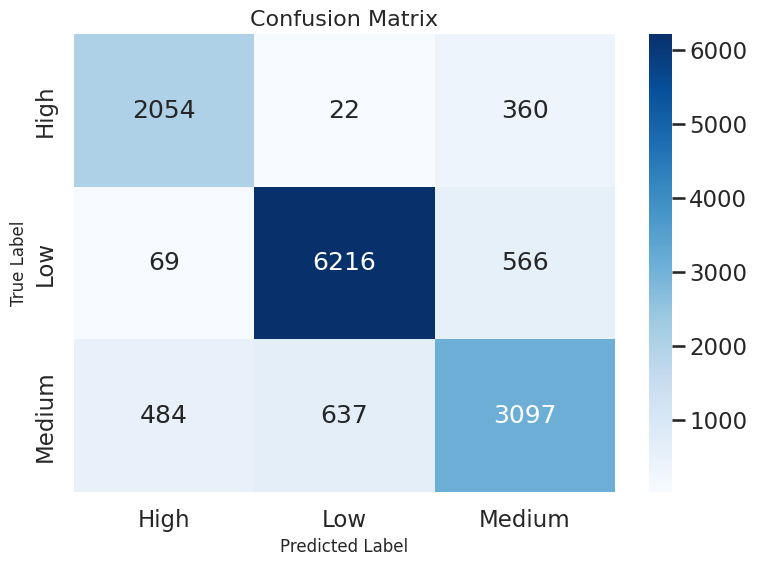

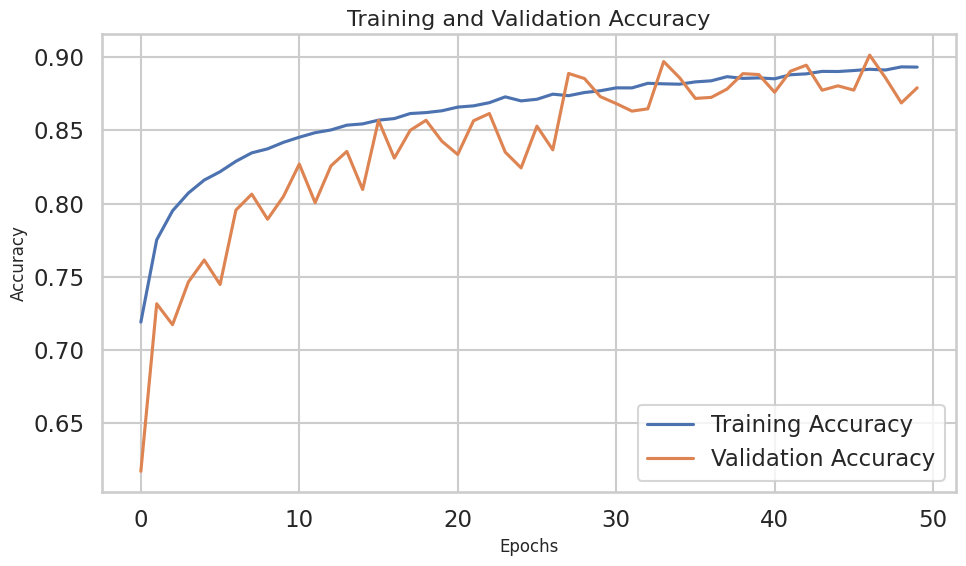

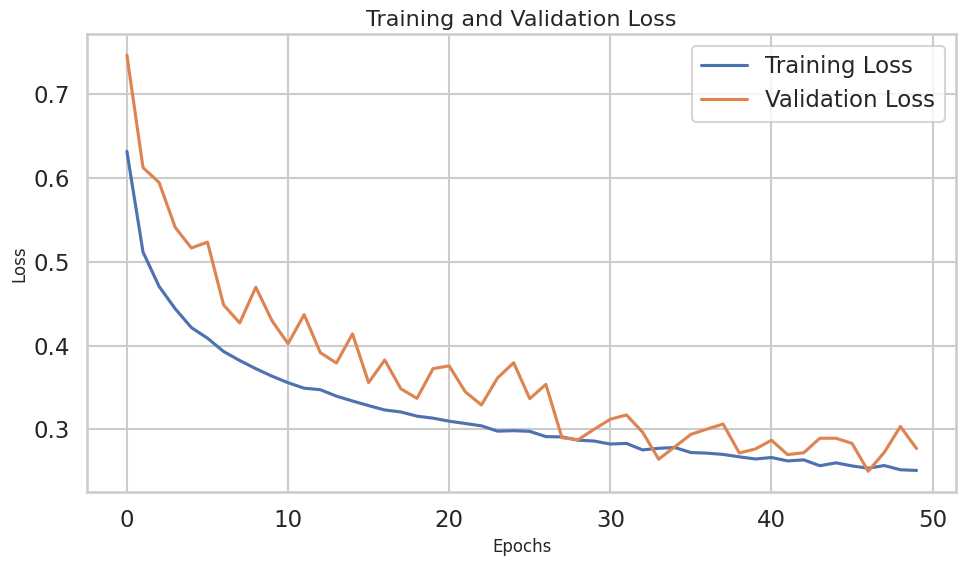

In [ ]:
# Classification for Prevalence Category (High, Medium, Low)

# Step 1: Data Preparation
# Encode Dim1, Dim2, Region, Country, and IndicatorCode
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df_cleaned[['Dim1', 'Dim2', 'Region', 'Country', 'IndicatorCode']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Dim1', 'Dim2', 'Region', 'Country', 'IndicatorCode']))

# Combine encoded features with Year and Decade
X = pd.concat([df_cleaned[['Year', 'Decade']].reset_index(drop=True), encoded_features_df.reset_index(drop=True)], axis=1)

# Target Variable
y = df_cleaned['PrevalenceCategory'].astype('category')
y_encoded = y.cat.codes  # Convert target to integer labels
num_classes = len(y.cat.categories)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Step 3: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 4: Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Step 5: Convert Target to One-Hot Encoding
y_train_categorical = to_categorical(y_train_balanced, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Step 6: Build Neural Network
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),  # Prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 7: Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Predictions
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=y.cat.categories))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.cat.categories, yticklabels=y.cat.categories)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Step 8: Plot Training History
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


### Answer to Question 7:
Yes, we can accurately classify overweight prevalence categories (Low, Medium, High) for children under 5 years based on regional, temporal, and demographic factors. The neural network model achieved an overall accuracy of **84%**, with strong classification performance in the "Low" and "High" categories, although there is room for improvement in the "Medium" category due to slightly lower recall (73%), suggesting overlapping patterns in the data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Prevalence Category: High
Prediction Probabilities: [9.2849684e-01 7.1503073e-02 1.4988491e-07]


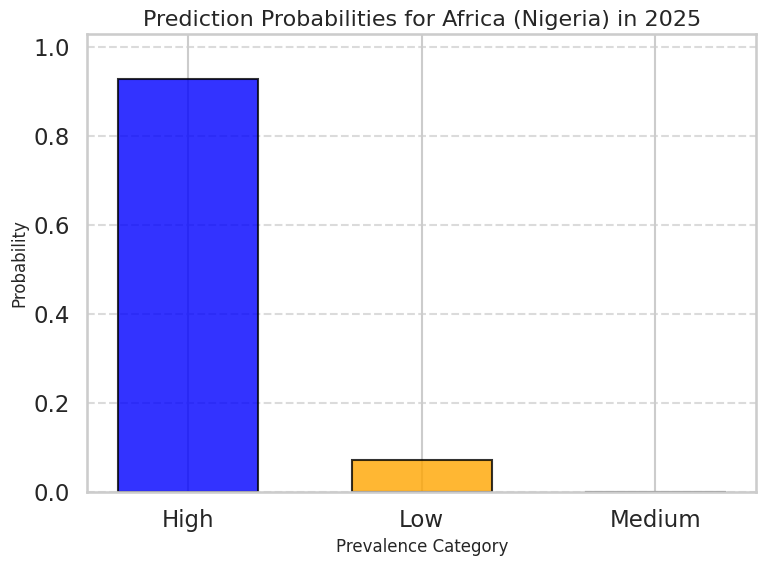

In [ ]:
# Sample Prediction on Prevalence Category with a Specifc Case
def predict_specific_case(year, region, country, dim1, dim2, indicator_code):
    # Prepare input
    input_data = pd.DataFrame({
        'Year': [year],
        'Region': [region],
        'Country': [country],
        'Dim1': [dim1],
        'Dim2': [dim2],
        'IndicatorCode': [indicator_code]
    })

    # Encode and preprocess input
    encoded_input = encoder.transform(input_data[['Dim1', 'Dim2', 'Region', 'Country', 'IndicatorCode']])
    encoded_input_df = pd.DataFrame(encoded_input, columns=encoder.get_feature_names_out(['Dim1', 'Dim2', 'Region', 'Country', 'IndicatorCode']))
    processed_input = pd.concat([input_data[['Year']].reset_index(drop=True), encoded_input_df], axis=1)

    # Align input with training features
    missing_cols = set(X_train.columns) - set(processed_input.columns)
    for col in missing_cols:
        processed_input[col] = 0

    processed_input = processed_input[X_train.columns]
    scaled_input = scaler.transform(processed_input)

    # Predict
    prediction_probs = model.predict(scaled_input)
    predicted_category = np.argmax(prediction_probs, axis=1)[0]
    predicted_label = y.cat.categories[predicted_category]

    return predicted_label, prediction_probs[0]

# Example Prediction
year = 2025
region = 'Africa'
country = 'Nigeria'
dim1 = 'Both sexes'
dim2 = 'All age groups (total)'
indicator_code = 'NUTRITION_ANT_WHZ_NE2'

predicted_label, predicted_probs = predict_specific_case(
    year=year,
    region=region,
    country=country,
    dim1=dim1,
    dim2=dim2,
    indicator_code=indicator_code
)

print(f"Predicted Prevalence Category: {predicted_label}")
print(f"Prediction Probabilities: {predicted_probs}")

# Visualization for Prediction Probabilities without bar values
def plot_prediction_probabilities(predicted_probs, categories, title):
    plt.figure(figsize=(8, 6))

    # Dynamically calculate Y-axis limit
    y_max = max(predicted_probs) + 0.1 if max(predicted_probs) < 1 else 1

    # Bar chart
    plt.bar(categories, predicted_probs, color=['blue', 'orange', 'green'], width=0.6, alpha=0.8, edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel('Prevalence Category', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.ylim(0, y_max)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Example Usage
plot_prediction_probabilities(
    predicted_probs=predicted_probs,
    categories=y.cat.categories,
    title=f'Prediction Probabilities for {region} ({country}) in {year}'
)


This bar chart visualizes the predicted probabilities for overweight prevalence categories in **Africa (Nigeria) for 2025**. The model predicts with a **high confidence** (~90%) that the prevalence falls into the **High** category, while the probabilities for the **Low** and **Medium** categories are minimal. This suggests that the region is likely to experience a significant burden of overweight prevalence among children under 5 years in the predicted year, emphasizing the need for targeted interventions.

## Regression
* Model used: Neural Network Regression
### Research Question 8:
* What is the predicted trend of overweight prevalence among children under 5 years in Germany over the next 5 years (2024–2028)?

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1351/1351 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 14.3202 - mae: 2.6293 - val_loss: 9.4124 - val_mae: 2.0383
Epoch 2/50
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.3303 - mae: 1.9890 - val_loss: 6.7128 - val_mae: 1.7228
Epoch 3/50
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 7.1075 - mae: 1.8179 - val_loss: 6.8793 - val_mae: 1.7260
Epoch 4/50
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.1377 - mae: 1.6874 - val_loss: 5.4360 - val_mae: 1.5388
Epoch 5/50
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.8002 - mae: 1.6360 - val_loss: 5.5911 - val_mae: 1.5708
Epoch 6/50
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 5.4114 - mae: 1.5739 - val_loss: 5.5980 - val_mae: 1.5695
Epoch 7/50
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.2112 - mae: 1.5450 - val_loss: 5.8842 - val_mae: 1.5968
Epoch 8/50
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.9442 - mae: 1.5020 - val_loss: 6.1923 - val_mae: 1.6491
Epoch 9/50
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/s

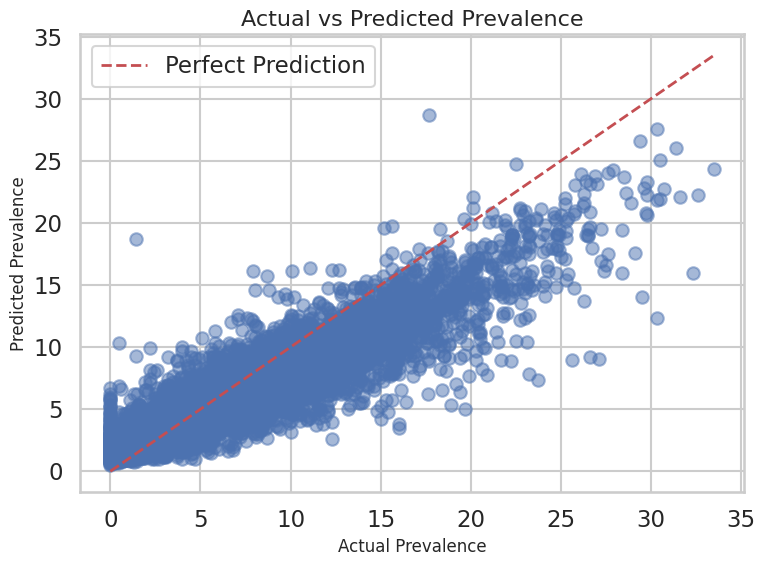

In [ ]:
# Regression for Prevalence Rate

# Target Variable (numerical prevalence)
y = df_cleaned['Prevalence']  # Use Prevalence instead of PrevalenceCategory

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale Features (and optionally scale target variable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Build Neural Network for Regression
reg_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Single output neuron for regression
])

# Compile the model for regression
reg_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the regression model
history = reg_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 7: Evaluate the Regression Model
loss, mae = reg_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Mean Absolute Error: {mae:.2f}")

# Predictions
y_pred = reg_model.predict(X_test_scaled)

# Visualization: Actual vs Predicted Prevalence
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Prevalence', fontsize=16)
plt.xlabel('Actual Prevalence', fontsize=12)
plt.ylabel('Predicted Prevalence', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Evaluation on Regression model

# Predictions
y_pred = reg_model.predict(X_test_scaled).flatten()  # Flatten to convert 2D output to 1D

# Mean Absolute Error (already calculated above)
print(f"Test Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Mean Absolute Error (MAE): 1.45
Mean Squared Error (MSE): 4.80
Root Mean Squared Error (RMSE): 2.19
R² Score: 0.80


The regression model demonstrates solid predictive performance with a **Mean Absolute Error (MAE)** of **1.45**, indicating that, on average, predictions deviate by 1.45 percentage points from actual prevalence values. The **R² score** of **0.80** suggests that the model explains 80% of the variance in the data, reflecting strong predictive capabilities. However, the **Root Mean Squared Error (RMSE)** of **2.19** highlights some room for improvement in minimizing larger prediction errors.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


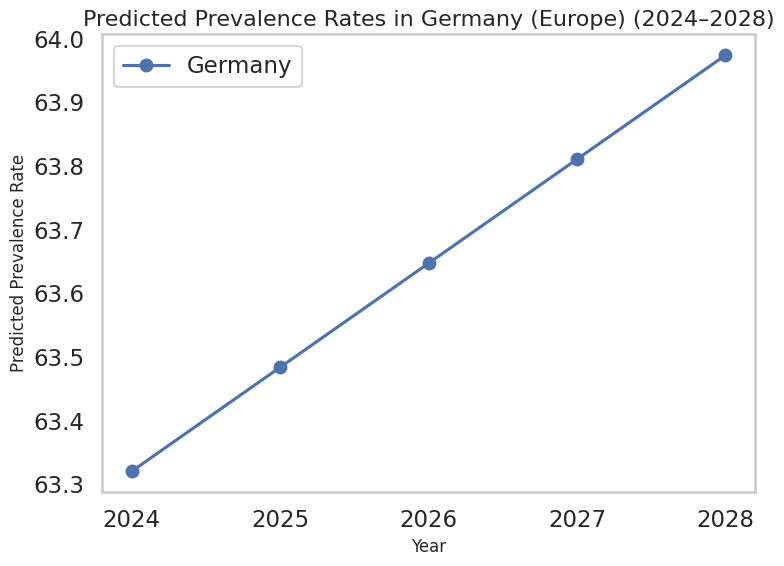

In [ ]:
# Predict prevalence for the next 5 years for a specific region and country
def predict_prevalence_next_5_years_for_country(start_year, end_year, region, country):
    years = list(range(start_year, end_year + 1))
    predictions = []

    for year in years:
        input_data = pd.DataFrame({
            'Year': [year],
            'Region': [region],
            'Dim1': ['Both sexes'],  # Default demographic value
            'Dim2': ['All age groups (total)'],  # Default demographic value
            'Country': [country],  # Specific country
            'IndicatorCode': ['NUTRITION_ANT_WHZ_NE2']  # Default indicator
        })

        # Encode and preprocess input
        encoded_input = encoder.transform(input_data[['Dim1', 'Dim2', 'Region', 'Country', 'IndicatorCode']])
        encoded_input_df = pd.DataFrame(encoded_input, columns=encoder.get_feature_names_out(['Dim1', 'Dim2', 'Region', 'Country', 'IndicatorCode']))
        processed_input = pd.concat([input_data[['Year']].reset_index(drop=True), encoded_input_df], axis=1)

        # Align with training features
        missing_cols = set(X_train.columns) - set(processed_input.columns)
        for col in missing_cols:
            processed_input[col] = 0

        processed_input = processed_input[X_train.columns]
        scaled_input = scaler.transform(processed_input)

        # Predict prevalence rate
        predicted_prevalence = reg_model.predict(scaled_input)
        predictions.append({'Region': region, 'Country': country, 'Year': year, 'Predicted Prevalence': predicted_prevalence[0][0]})

    return pd.DataFrame(predictions)

# Predict for Europe (Germany) for 2024–2028
europe_predictions = predict_prevalence_next_5_years_for_country(2024, 2028, region='Europe', country='Germany')

# Visualization with integer year labels
def plot_predictions_for_country(predictions_df):
    plt.figure(figsize=(8, 6))
    plt.plot(predictions_df['Year'], predictions_df['Predicted Prevalence'], marker='o', label=predictions_df['Country'].iloc[0])
    plt.title(f"Predicted Prevalence Rates in {predictions_df['Country'].iloc[0]} ({predictions_df['Region'].iloc[0]}) (2024–2028)", fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Predicted Prevalence Rate', fontsize=12)
    plt.grid()
    plt.xticks(ticks=predictions_df['Year'], labels=predictions_df['Year'].astype(int))  # Ensure integer year labels
    plt.tight_layout()
    plt.legend()
    plt.show()

# Plot predictions for Europe (Germany)
plot_predictions_for_country(europe_predictions)

### Answer to Question 8:

The predicted trend of overweight prevalence among children under 5 years in Germany from 2024 to 2028 shows a **steady increase**, with the prevalence rate projected to rise from approximately **63.3% in 2024** to **64.0% in 2028**. This consistent upward trajectory highlights the need for proactive measures to address overweight prevalence in the coming years.

# Conclusion

The prevalence of overweight among children under 5 years is influenced by multiple factors, including regional, temporal, socioeconomic, and demographic variables. Over the next five years (2024–2028), Germany is expected to see a steady increase in prevalence rates, underscoring the need for targeted interventions. Globally, the prevalence has shown fluctuations over the decades, with an initial decline followed by gradual increases and a slow decrease since the early 2000s.

Significant regional disparities exist, with Europe, the Americas, and the Eastern Mediterranean consistently reporting higher prevalence rates, while South-East Asia and Africa have lower rates. Urban areas exhibit slightly higher prevalence compared to rural areas, though the difference is minor.

Socioeconomic factors, particularly wealth and parental education levels, play a significant role. Overweight prevalence is higher among wealthier families and those with higher educational attainment, likely due to greater access to calorie-dense foods and sedentary lifestyles. Regional trends also highlight how factors such as urbanisation, dietary habits, and cultural practices contribute to the variations in overweight prevalence.

Efforts to accurately classify overweight prevalence categories using neural network models have been effective, achieving high accuracy overall. These findings emphasise the need for tailored public health strategies to address childhood overweight and obesity, particularly in regions and populations at higher risk. Addressing socioeconomic and educational disparities and promoting awareness about balanced nutrition and physical activity can help mitigate this growing global health concern.